## ResNets

* Vimos que entrenar redes muy profundas presenta dificultades:
 * Una son los gradientes que tienden a cero o explotan (vanishing y exploding gradients).
 * La otra es la degradación de la performance en el training set.
* Una de las técnicas para resolverlo son las redes residuales.
* Vamos a construir los bloques para armar una ResNet.




En las ResNets las 'skip connections' o 'shortcuts' o 'residual connections' permiten 'saltar capas'
a "shortcut" or a "skip connection" allows the model to skip layers:  

<img src="https://raw.githubusercontent.com/enggen/Deep-Learning-Coursera/master/Convolutional%20Neural%20Networks/Week2/ResNets/images/skip_connection_kiank.png" style="width:650px;height:200px;">
<caption><center> <u> <font color='purple'> **Figure 2** </u><font color='purple'>  : Un bloque ResNet donde se exhibe una **skip-connection** <br> </center></caption>

La imagen a la izquierda muestra el camino principal de la red. La imagen de la derecha agrega un 'shortcut' al camino principal. Apilando estos bloques podemos armar redes con arquitecturas muy profundas.

Agregar un bloque adicional con una conexión residual hace muy fácil imitar la función identidad, por lo tanto agregar bloques residuales agrega poco riesgo de degradar la performance en el set de entrenamiento.
    
Hay dos bloques principales, el que se usa depende de si la dimensión de salida del bloque es la misma que la de entrada o no:
    * El bloque con tamaño de entrada = tamaño de salida se llama bloque identidad (identity block).
    * El bloque con entrada != tamaño se llama bloque convolucional (convolutional block).
    


### Bloque identidad

El bloque identidad es un bloque estándar utilizado en ResNets, y corresponde al caso en que la activación de entrada (por ej. $a^{[l]}$)  tiene la misma dimensión a la activación de salida ($a^{[l+2]}$). Para esquematizar los diferentes pasos de lo que ocurre en un bloque de identidad de una ResNet, el siguiente diagrama muestra los pasos indivuales:

<img src="https://github.com/enggen/Deep-Learning-Coursera/raw/master/Convolutional%20Neural%20Networks/Week2/ResNets/images/idblock2_kiank.png" style="width:650px;height:150px;">
<caption><center> <u> <font color='purple'> **Figura 1** </u><font color='purple'>  : **Bloque Identidad.** Skip connection "salta" 2 capas. </center></caption>

El camino superior es el 'atajo' o 'shortcut'. El camino superior es el 'camino principal'. En este diagrama se han hecho explícitos el paso convolucional y la no-linearidad ReLU. Para acelerar el entrenamiento también agregamos un paso de Batch Normalization. 
    
En el ejercicio de abajo hay que implementar una versión un poco más poderosa del bloque identidad, en el cual 'saltamos' conexiones sobre 3 capas ocultas en vez de 2. Se ve así:

<img src="https://github.com/enggen/Deep-Learning-Coursera/raw/master/Convolutional%20Neural%20Networks/Week2/ResNets/images/idblock3_kiank.png" style="width:650px;height:150px;">
<caption><center> <u> <font color='purple'> **Figura 2** </u><font color='purple'>  : **Bloque Identidad.** Skip connection "salta" 3 capas.</center></caption>

In [57]:
# imports
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import backend
import numpy as np
import tensorflow as tf

In [58]:
def identity_block(input_tensor, kernel_size, filters, stage, block):
    """
    El bloque identidad tiene el tamaño del input igual al tamaño del output
    
    # Argumentos
        input_tensor: tensor de entrada
        kernel_size: el default es 3, tamaño del kernel de la capa media en el camino principal
        filters: lista de enteros, cantidad de filtros de las 3 capas CONV en el camino principal
        stage: entrada, rótulo de la etapa actual, usado para generar los nombres de las capas
        block: 'a', 'b'..., rótulo del bloque actual, usado para generar nombres de capas
        
    # Retorna
        Tensor de salida del bloque.
    """
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch' # nombre base para las capas convolucionales
    bn_name_base = 'bn' + str(stage) + block + '_branch' # nombre base para las capas residuales

    # sub-bloque a
    # para los nombres utilizar conv_name_base + '2a' para capas conv y bn_name_base + '2a' 
    # agregar una capa Conv2D, usar he_normal como kernel_initializer, kernel_size -> (1,1), # de filtros filters1
    # agregar Batch Normalization
    # agregar activación ReLU
    # esta parte YA fue implementada
    
    x = layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)
    
    # sub-bloque b
    # para los nombres utilizar conv_name_base + '2b' para capas conv y bn_name_base + '2b' 
    # agregar una capa Conv2D, usar he_normal como kernel_initializer, kernel_size -> el parametro kernel_size
    # # de filtros filters2, padding="same"
    # agregar Batch Normalization
    # agregar activación ReLU

    x = layers.Conv2D(filters2, kernel_size=kernel_size,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b',
                      padding='same')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)
    
    # sub-bloque c
    # para los nombres utilizar conv_name_base + '2c' para capas conv y bn_name_base + '2c' 
    # agregar una capa Conv2D, usar he_normal como kernel_initializer, kernel_size -> (1,1), # de filtros filters3
    # agregar Batch Normalization
    # agregar activación ReLU

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)
    #x = layers.Activation('relu')(x)
    
    # sumar el tensor de entrada al resultado de las anteriores operaciones (usar la función layers.add(...))
    # agregar activación ReLU

    added = layers.Add()([input_tensor, x])
    x = layers.Activation('relu')(added)
    print('idblock added')

    # retornar el tensor resultante
    return x

In [59]:
A_prev = layers.Input([4, 4, 6])
X = np.random.randn(3, 4, 4, 6)
A = identity_block(A_prev, 2, [2, 4, 6],1 ,'a')
model = models.Model(A_prev, A, name='identity_block')
model.summary()

idblock added
Model: "identity_block"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 4, 4, 6)]    0                                            
__________________________________________________________________________________________________
res1a_branch2a (Conv2D)         (None, 4, 4, 2)      14          input_24[0][0]                   
__________________________________________________________________________________________________
bn1a_branch2a (BatchNormalizati (None, 4, 4, 2)      8           res1a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_71 (Activation)      (None, 4, 4, 2)      0           bn1a_branch2a[0][0]              
_______________________________________________________________________

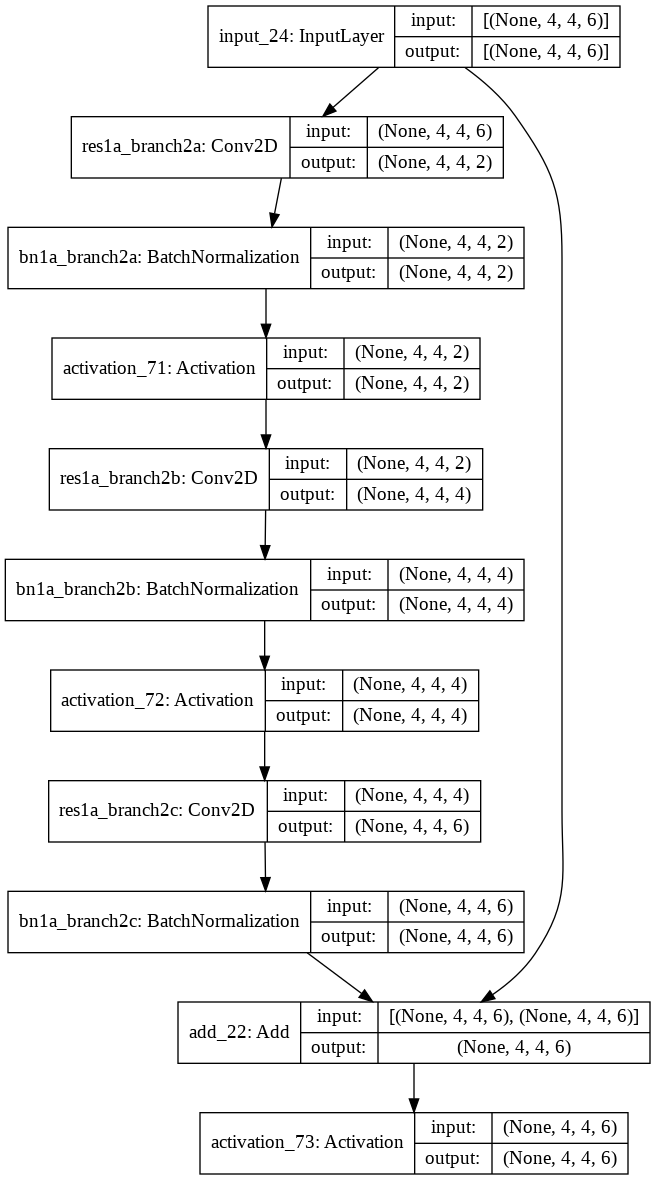

In [60]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Salida esperada:

Model: "identity_block"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_27 (InputLayer)           [(None, 4, 4, 6)]    0                                            
__________________________________________________________________________________________________
res1a_branch2a (Conv2D)         (None, 4, 4, 2)      14          input_27[0][0]                   
__________________________________________________________________________________________________
bn1a_branch2a (BatchNormalizati (None, 4, 4, 2)      8           res1a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 4, 4, 2)      0           bn1a_branch2a[0][0]              
__________________________________________________________________________________________________
res1a_branch2b (Conv2D)         (None, 4, 4, 4)      36          activation_64[0][0]              
__________________________________________________________________________________________________
bn1a_branch2b (BatchNormalizati (None, 4, 4, 4)      16          res1a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_65 (Activation)      (None, 4, 4, 4)      0           bn1a_branch2b[0][0]              
__________________________________________________________________________________________________
res1a_branch2c (Conv2D)         (None, 4, 4, 6)      30          activation_65[0][0]              
__________________________________________________________________________________________________
bn1a_branch2c (BatchNormalizati (None, 4, 4, 6)      24          res1a_branch2c[0][0]             
__________________________________________________________________________________________________
add_21 (Add)                    (None, 4, 4, 6)      0           bn1a_branch2c[0][0]              
                                                                 input_27[0][0]                   
__________________________________________________________________________________________________
activation_66 (Activation)      (None, 4, 4, 6)      0           add_21[0][0]                     
==================================================================================================
Total params: 128
Trainable params: 104
Non-trainable params: 24
__________________________________________________________________________________________________

## Bloque convolucional

El bloque convolucional de la ResNet es el segundo tipo de bloque. Se puede usar este tipo de bloque cuando las dimensiones de la entrada y de la salida no coinciden.


<img src="https://github.com/enggen/Deep-Learning-Coursera/raw/master/Convolutional%20Neural%20Networks/Week2/ResNets/images/convblock_kiank.png" style="width:650px;height:150px;">
<caption><center> <u> <font color='purple'> **Figura 3** </u><font color='purple'>  : **Bloque convolucional** </center></caption>

* La capa CONV2D en el 'shortcut' es usada para redimensionar la entrada $x$ a una dimensión diferente, de tal manera que las dimensiones coinciden en la suma final necesaria para sumar el la skip connection al 'flujo' principal.
* Por ejemplo, para reducir la altura y ancho de las activaciones por un factor de 2, podemos usar una convolución 1x1 con un stride de 2.
* La capa CONV2D en el la skip connection no usa ninguna función no-lineal. Su rol principal es simplemente aplicar una función lineal que reduce la dimensión de la entrada para que coincidan las dimensiones.


In [61]:
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2)):
    """Un bloque que tiene una capa convolucional como shortcut.

    # Argumentos
        input_tensor: tensor de entrada
        kernel_size: el default es 3, tamaño del kernel de la capa media en el camino principal
        filters: lista de enteros, cantidad de filtros de las 3 capas CONV en el camino principal
        stage: entrada, rótulo de la etapa actual, usado para generar los nombres de las capas
        block: 'a', 'b'..., rótulo del bloque actual, usado para generar nombres de capas
        strides: Strides para la primera capa convolucional del bloque.

    # Retorna
        Tensor de salida del bloque.
    """
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # sub-bloque a
    # para los nombres utilizar conv_name_base + '2a' para capas conv y bn_name_base + '2a' 
    # agregar una capa Conv2D, usar he_normal como kernel_initializer, kernel_size -> (1,1)
    # agregar Batch Normalization
    # agregar activación ReLU
    
    x = layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)
    
    # sub-bloque b
    # para los nombres utilizar conv_name_base + '2b' para capas conv y bn_name_base + '2b' 
    # agregar una capa Conv2D, usar he_normal como kernel_initializer, kernel_size -> el parametro kernel_size
    # # de filtros filters2, padding="same"
    # agregar Batch Normalization
    # agregar activación ReLU

    x = layers.Conv2D(filters2, kernel_size=kernel_size,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b',
                      padding='same')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)
    
    # sub-bloque c
    # para los nombres utilizar conv_name_base + '2c' para capas conv y bn_name_base + '2c' 
    # agregar una capa Conv2D, usar he_normal como kernel_initializer, kernel_size -> (1,1), # de filtros filters3
    # agregar Batch Normalization
    # agregar activación ReLU

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)
    
    # conexión shortcut:
    # agregar una capa convolucional que actúe sobre el tensor de entrada
    # esta capa de shortcut tiene filtros de tamaño 1x1 y stride (2,2)
    # agregar Batch Normalization

    shortcut = layers.Conv2D(6, (1,1), (2,2))(input_tensor)
    shortcut = layers.BatchNormalization(axis=bn_axis, name='shortcut')(shortcut)
    
    # aplicar la conexión shortcut al tensor de entrada 
    # y sumarle a esto el resultado de aplicar las anteriores operaciones (el camino principal) 
    # a la entrada
    # agregar activación ReLU

    added = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(added)
    print('convblock added')
    # retornar el tensor resultante
    return x

In [62]:
A_prev = layers.Input([4, 4, 6])
X = np.random.randn(3, 4, 4, 6)
A = conv_block(A_prev, 2, [2, 4, 6],1 ,'a')
model = models.Model(A_prev, A, name='conv_block')
model.summary()

convblock added
Model: "conv_block"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 4, 4, 6)]    0                                            
__________________________________________________________________________________________________
res1a_branch2a (Conv2D)         (None, 2, 2, 2)      14          input_25[0][0]                   
__________________________________________________________________________________________________
bn1a_branch2a (BatchNormalizati (None, 2, 2, 2)      8           res1a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 2, 2, 2)      0           bn1a_branch2a[0][0]              
_________________________________________________________________________

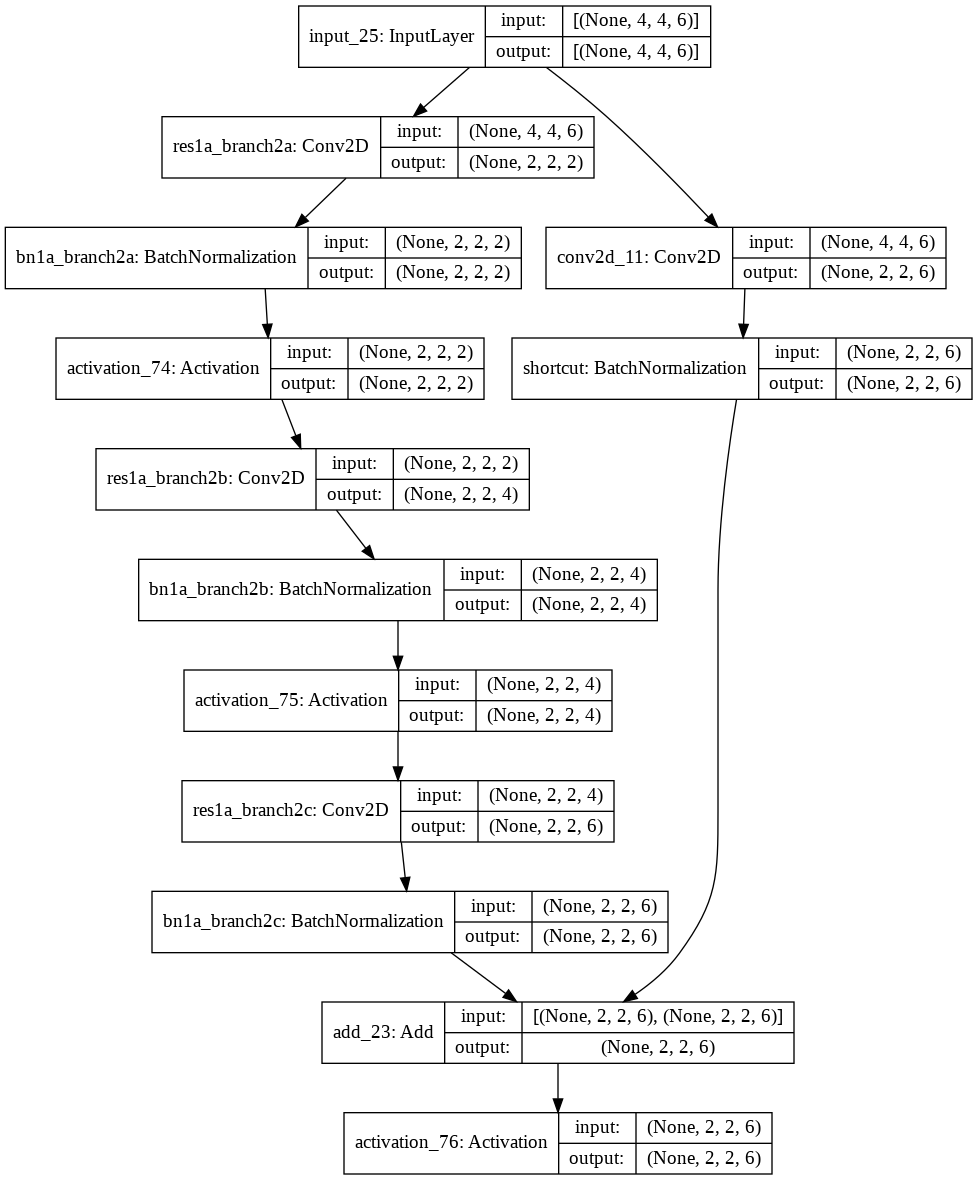

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Salida esperada:

Model: "conv_block"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_28 (InputLayer)           [(None, 4, 4, 6)]    0                                            
__________________________________________________________________________________________________
res1a_branch2a (Conv2D)         (None, 2, 2, 2)      14          input_28[0][0]                   
__________________________________________________________________________________________________
bn1a_branch2a (BatchNormalizati (None, 2, 2, 2)      8           res1a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_67 (Activation)      (None, 2, 2, 2)      0           bn1a_branch2a[0][0]              
__________________________________________________________________________________________________
res1a_branch2b (Conv2D)         (None, 2, 2, 4)      36          activation_67[0][0]              
__________________________________________________________________________________________________
bn1a_branch2b (BatchNormalizati (None, 2, 2, 4)      16          res1a_branch2b[0][0]             
__________________________________________________________________________________________________
activation_68 (Activation)      (None, 2, 2, 4)      0           bn1a_branch2b[0][0]              
__________________________________________________________________________________________________
res1a_branch2c (Conv2D)         (None, 2, 2, 6)      30          activation_68[0][0]              
__________________________________________________________________________________________________
res1a_branch1 (Conv2D)          (None, 2, 2, 6)      42          input_28[0][0]                   
__________________________________________________________________________________________________
bn1a_branch2c (BatchNormalizati (None, 2, 2, 6)      24          res1a_branch2c[0][0]             
__________________________________________________________________________________________________
bn1a_branch1 (BatchNormalizatio (None, 2, 2, 6)      24          res1a_branch1[0][0]              
__________________________________________________________________________________________________
add_22 (Add)                    (None, 2, 2, 6)      0           bn1a_branch2c[0][0]              
                                                                 bn1a_branch1[0][0]               
__________________________________________________________________________________________________
activation_69 (Activation)      (None, 2, 2, 6)      0           add_22[0][0]                     
==================================================================================================
Total params: 194
Trainable params: 158
Non-trainable params: 36
__________________________________________________________________________________________________

## Función para armar ResNet50

Con estos bloques es posible armar ResNet50. La siguiente imagen demuestra la arquitectura en detalle. "ID BLOCK" significa "Identity Block", "ID BLOCK x3" significa que debemos apilar 3 identity blocks juntos.

<img src="https://github.com/enggen/Deep-Learning-Coursera/raw/master/Convolutional%20Neural%20Networks/Week2/ResNets/images/resnet_kiank.png" style="width:850px;height:150px;">
<caption><center> <u> <font color='purple'> **Figure 4** </u><font color='purple'>  : **ResNet-50** </center></caption>



In [64]:
def ResNet50(input_shape=(224, 224, 3),
             classes=1000,
             **kwargs):
    """
    Instancia la arquitectura ResNet50.
    
    # Argumentos
        input_tensor: tensor de Keras opcional para usar de imagen de entrada al modelo
        optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: tiene que tener 3 canales de entrada
        classes: número opcional de clases en las que clasificar las imágenes

    # Retorna
        Un modelo de Keras
    """

    img_input = layers.Input(shape=input_shape)
    
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    
    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = layers.Dense(classes, activation='softmax', name='fc1000')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    
    inputs = img_input
    # Create model.
    model = models.Model(inputs, x, name='resnet50')

    return model

In [66]:
# comparar la estructura con la ResNet en keras
model = ResNet50()
model.summary()

ValueError: ignored